# Serge_Exam_Big_Data_AIMS_Senegal_2015

## Importation of libraries

In [219]:
import os
import sys
import pylab
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


## Path of the data

In [2]:
data_filepath='/media/ghomsi/SERGUEI/Big_Data/bigdata_aims_senegal/data/UN.csv'
print 'The path to the training data set is correct: ', os.path.exists(data_filepath)

The path to the training data set is correct:  True


# a) Reading of data

In [3]:
df = pd.read_csv(data_filepath)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 14 columns):
country                   207 non-null object
region                    207 non-null object
tfr                       197 non-null float64
contraception             144 non-null float64
educationMale             76 non-null float64
educationFemale           76 non-null float64
lifeMale                  196 non-null float64
lifeFemale                196 non-null float64
infantMortality           201 non-null float64
GDPperCapita              197 non-null float64
economicActivityMale      165 non-null float64
economicActivityFemale    165 non-null float64
illiteracyMale            160 non-null float64
illiteracyFemale          160 non-null float64
dtypes: float64(12), object(2)

## b) Number of Rows and columns in tha data

In [329]:
df.shape

(207, 14)

## Visualisation of setdata

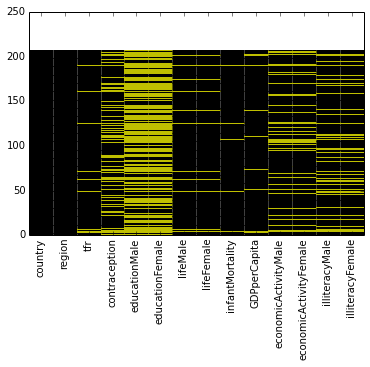

In [6]:
get_ipython().magic(u'matplotlib inline')
def missmap(df, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    dfn = pd.isnull(df)
    ny = len(df)
    nx = len(df.columns)
    dfn = pd.isnull(df)
    x = np.arange(len(df.columns))
    xgrid = np.tile(x, (len(df), 1)).T
    c = {True: 'y', False: 'k'}
    ax.set_xlim(0, nx)
    for x, col in zip(xgrid, dfn.columns):
        yvals = dfn[col]
        ax.bar(x, yvals, bottom=np.arange(1, ny+1), width=1,
               color=dfn[col].map(c), edgecolor=dfn[col].map(c))
    ax.set_xticks(.5 + np.arange(nx))
    ax.set_xticklabels(dfn.columns)
    for t in ax.get_xticklabels():
        t.set_rotation(90)
    return ax

missmap(df)

### Comments: 
This figure showns a lot of missing data on certains parameters such as Contarception, education Female and Male, Economic activity Male and Female, Itlliteracy Male and Female.

## Data Clean:  Drop of parameters which contains a lot of missing data and deleting of NaN values on the others columns

In [9]:
df_clean = df.drop(['contraception','educationMale','educationFemale','economicActivityMale','economicActivityFemale','illiteracyMale','illiteracyFemale'], axis=1)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 7 columns):
country            207 non-null object
region             207 non-null object
tfr                197 non-null float64
lifeMale           196 non-null float64
lifeFemale         196 non-null float64
infantMortality    201 non-null float64
GDPperCapita       197 non-null float64
dtypes: float64(5), object(2)

In [11]:
df_clean_d = df_clean.dropna()

In [12]:
df_clean_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 206
Data columns (total 7 columns):
country            188 non-null object
region             188 non-null object
tfr                188 non-null float64
lifeMale           188 non-null float64
lifeFemale         188 non-null float64
infantMortality    188 non-null float64
GDPperCapita       188 non-null float64
dtypes: float64(5), object(2)

## Convert pandas in array

In [25]:
data = df_clean_d.values
data


array([['Afghanistan', 'Asia', 6.9, ..., 46.0, 154.0, 2848.0],
       ['Albania', 'Europe', 2.6, ..., 74.0, 32.0, 863.0],
       ['Algeria', 'Africa', 3.81, ..., 70.3, 44.0, 1531.0],
       ..., 
       ['Yugoslavia', 'Europe', 1.8, ..., 75.3, 19.0, 1487.0],
       ['Zambia', 'Africa', 5.49, ..., 43.7, 103.0, 382.0],
       ['Zimbabwe', 'Africa', 4.68, ..., 49.4, 68.0, 786.0]], dtype=object)

#  D)   Plot and analysis of LifeMale and LifeFemale

## Application of KMeans on data

In [177]:
clust=KMeans(n_clusters=3,n_init=10,init='k-means++',verbose=0)#
Ckm=clust.fit_predict(data[:,3:5]) # Compute cluster centers and predict cluster index for each sample.
data_d=clust.transform(data[:,3:5]) # #pour avoir les distances de chaque élément aux centres des clusters


In [179]:
color=('g','b','r')
label = ('First cluster', 'Second cluster','Third cluster')
country0 = data[Ckm==0,0]
country1 = data[Ckm==1,0]
country2 = data[Ckm==2,0]



## Visualisation of result of KMean applied on lifeMale and lifeFemale

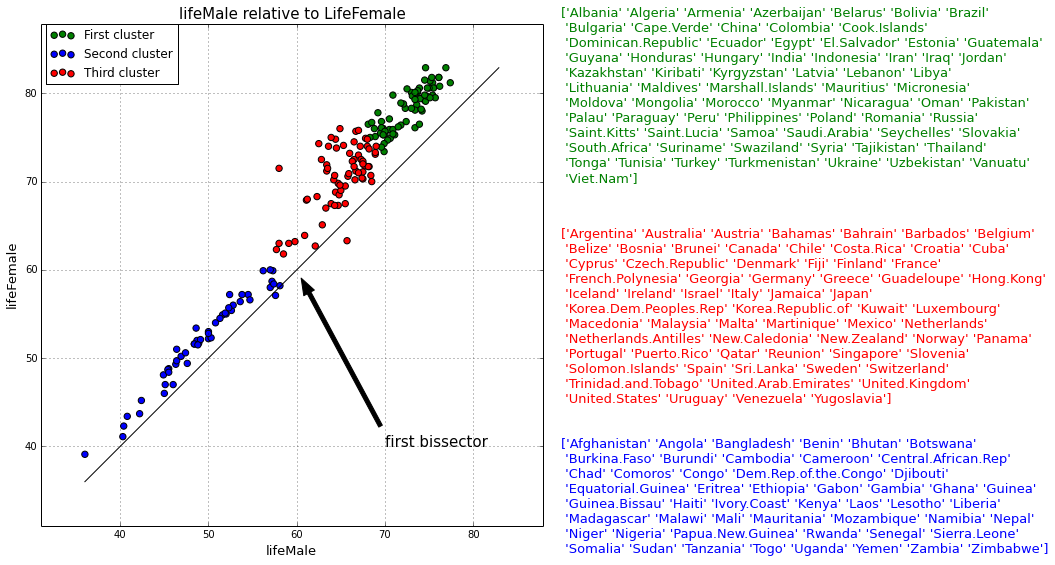

In [339]:
plt.figure(figsize=(9,9))
for k in range(3):
    plt.scatter(data[Ckm==k,3],data[Ckm==k,4],c=color[k],s=40,label=label[k])
plt.scatter(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],c='y',marker='o',s=100)
plt.plot([np.min(data[:,3:5]),np.max(data[:,3:5])],[np.min(data[:,3:5]),np.max(data[:,3:5])],c='k')
plt.grid()
plt.xlabel('lifeMale',fontsize=13)
plt.ylabel('lifeFemale',fontsize=13)
plt.title('lifeMale relative to LifeFemale',fontsize=15)
plt.axis('scaled')
plt.legend(bbox_to_anchor=(0.01, 1), loc=2, borderaxespad=0.)
plt.text(90, 70,pays0,color=color[0],fontsize=13 )#, ha='center', va='center')#, transform=ax.transAxes)
plt.text(90, 28,pays1,color=color[1],fontsize=13 )
plt.text(90, 45,pays2,color=color[2],fontsize=13 )
plt.ylim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)
plt.xlim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)
plt.annotate('first bissector', xy=(60, 60), xytext=(70, 40),fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05))

In [343]:
print data[np.where(data[:,3]<40),0]
print data[np.where(data[:,3]>data[:,4]),0]

[['Sierra.Leone']]
[['Maldives' 'Nepal']]


## Commentaires: 

### On peut remarquer que  les  trois groupes ressortent les différentes cathégories de pays dans le monde: 

### 1er groupe en bleu: C'est le groupe de pays sous developpés où on peut voir que l'espérance de vie des hommes est très faible compris entre 30 et 60 ans cela traduit le niveau précaire du système de santé dans ces pays.

### 2ème groupe en rouge: c'est le groupe de pays en voie de developement ou encore émergent ou on peut voir que l'espérance de vie est assez élevée 

### 3ème groupe en bleu: c'est le groupe de pays ayant un très bon système de santé, ou les principales cause de déces ne sont pas infecteueses.

### Globalement on peut remarquer que l'espérance de vie chez la femme est supérieure à celle des hommes. Mais on peut aussi remarquer qu'il y a certains pays où c'est le contraire comme à Maldive et au Népal. Et aussi il y a un pays ou lespérance de vie est inférieure à 40 ans ce pays est: Sierra léonne, Cela peut être du à guerre qui avait longtemps sécoué ce pays de l'Afrique de l'Ouest

#  C)   Plot and analysis of LifeMale and LifeFemale

In [332]:
clust_1=KMeans(n_clusters=3,n_init=10,init='k-means++',verbose=0)#
Ckm_1=clust_1.fit_predict(data[:,5:7]) # Compute cluster centers and predict cluster index for each sample.
data_d_1=clust_1.transform(data[:,5:7])
country0_0 = data[Ckm_1==0,0]
country1_0 = data[Ckm_1==1,0]
country2_0 = data[Ckm_1==2,0]
color=('g','b','r')

## Visualisation of result of KMean applied  on GDPperCapita  and infantMortality

(0, 180)

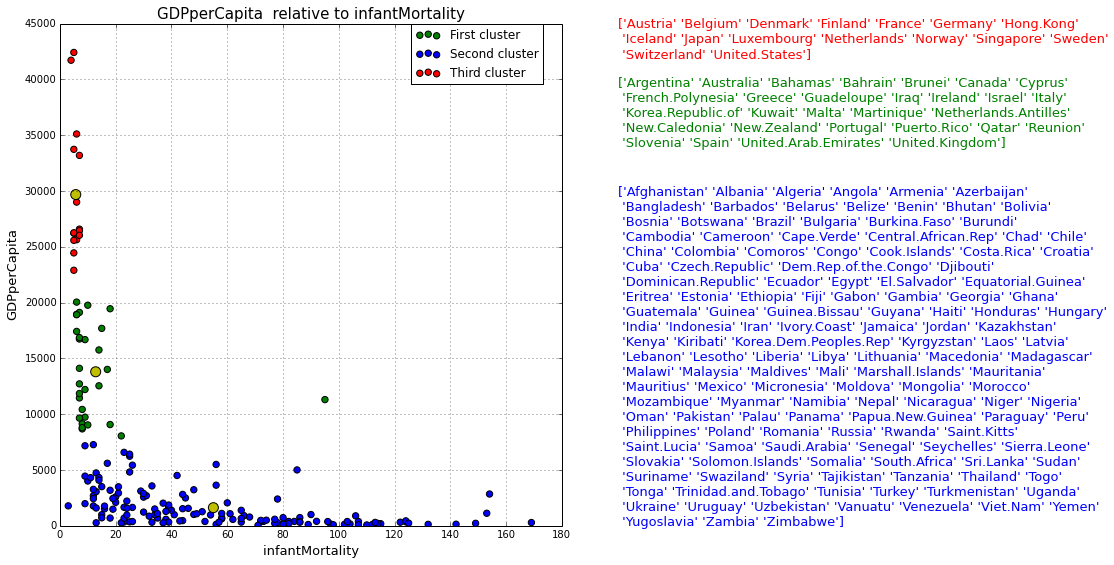

In [346]:
plt.figure(figsize=(9,9))
for k in range(3):
    plt.scatter(data[Ckm_1==k,5],data[Ckm_1==k,6],c=color[k],s=40,label=label[k])
plt.scatter(clust_1.cluster_centers_[:,0],clust_1.cluster_centers_[:,1],c='y',marker='o',s=100)
plt.grid()
plt.xlabel('infantMortality ',fontsize=13)
plt.ylabel('GDPperCapita',fontsize=13)
plt.title('GDPperCapita  relative to infantMortality ',fontsize=15)
plt.legend(bbox_to_anchor=(0.7, 1), loc=2, borderaxespad=0.)
plt.text(200, 34000,country0_0,color=color[0],fontsize=13 )#, ha='center', va='center')#, transform=ax.transAxes)
plt.text(200, 0,country1_0,color=color[1],fontsize=13 )
plt.text(200, 42000,country2_0,color=color[2],fontsize=13 )
plt.ylim(0,45000)
plt.xlim(0,180)

In [347]:
print data[np.where((data[:,5]>90) & (data[:,6]>10000)),0]

[['Iraq']]


## Commentaires:

### Sur cette figure, en appliquant le KMeans avec 3 clusters, on peut effectivement voir le regroupement des cathégories de pays en fonction du PIB et de la mortalité infantile. 

### Plus le PIB est élevé moins on a de mortalité infantile, cela traduit tout simplement que lorsqu'on a un fort PIB dont developpé, le système sanitaire est bon et donc on a moins de mortalité chez les enfants.

### Mais sur cette figure, on peut voir un pays qui a un PIB supérieure à 10.000 mais avec une mortalité infantile supérieure à 90, ce pays est l'Irack, cela peut être du à la guerre qui a fatalement baissé le taux de mortalité infantile.


#  e) Plot and analysis of  GDPperCapita, lifeFemale and infantMortality

In [348]:
clust_2=KMeans(n_clusters=3,n_init=10,init='k-means++',verbose=0)#
Ckm_2=clust_2.fit_predict(data[:,4:7]) # Compute cluster centers and predict cluster index for each sample.
data_d_2=clust_2.transform(data[:,4:7])
country0_1 = data[Ckm_2==0,0]
country1_1 = data[Ckm_2==1,0]
country2_1 = data[Ckm_2==2,0]
color=('g','b','r')

## 3DVisualisation of result of KMean applied  on GDPperCapita, lifeFemale and infantMortality

(30, 90)

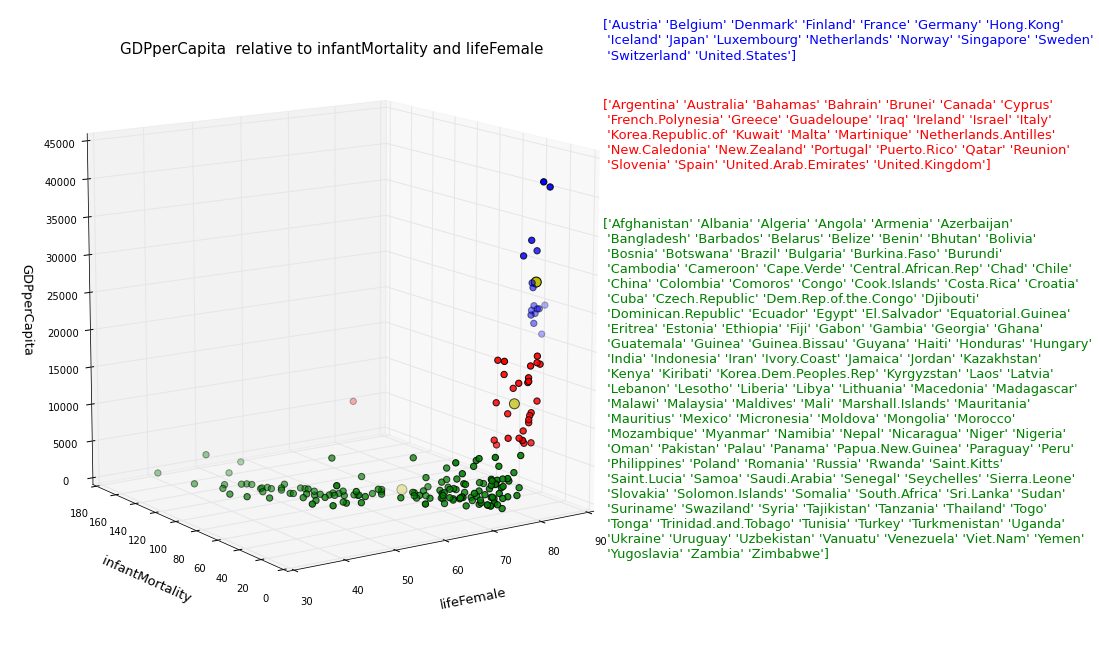

In [349]:
fig =plt.figure(figsize=(9,9))

ax = Axes3D(fig)
for k in range(3):
    ax.scatter(data[Ckm_2==k,4],data[Ckm_2==k,5],data[Ckm_2==k,6],c=color[k],s=40,label=label[k])
ax.scatter(clust_2.cluster_centers_[:,0],clust_2.cluster_centers_[:,1],clust_2.cluster_centers_[:,2],c='y',marker='o',s=100)
plt.grid()
ax.set_xlabel('lifeFemale',fontsize=13)
ax.set_ylabel('infantMortality ',fontsize=13)
ax.set_zlabel('GDPperCapita',fontsize=13)
ax.set_title('GDPperCapita  relative to infantMortality and lifeFemale',fontsize=15)
ax.set_zlim(0,45000)
ax.set_ylim(0,180)
ax.set_xlim(30,90)
ax.text2D(0.92,0.15,country0_1,color=color[0],fontsize=13,transform=ax.transAxes )#, ha='center', va='center')#, transform=ax.transAxes)
ax.text2D(0.92,0.92,country1_1,color=color[1],fontsize=13,transform=ax.transAxes )
ax.text2D(0.92,0.75, country2_1,color=color[2],fontsize=13,transform=ax.transAxes )
ax.view_init(elev=13, azim=-124)
ax.set_zlim(0,45000)
ax.set_ylim(0,180)
ax.set_xlim(30,90)


## Commentaires:

###  Cette figure 3D du PIB en fonction de l'espérance de vie des femme et de la mortalité infantile nous donne encore plus de précision et d'information.

### On peut voir que le groupe de couleur bleu est celui des pays ayant un fort PIB une mortalité infantile très faible et une espérance de vie très élevée, Cela nous montre tout simplement les pays très developpés avec un système sanitaire très bon et un niveau de vie très élevé.

### On peut aussi conclure dès lors une forte relation entre le PIB (le niveau de vie) et la mortalité infantile et l'espérance de vie (Système sanitaire) dans tous les pays.

# f) Bonus pour vous (rire) Histogram of GDPperCapita

In [226]:
clust_2.cluster_centers_

array([[  6.49195804e+01,   5.50139860e+01,   1.62453846e+03],
       [  8.06812500e+01,   5.68750000e+00,   2.96816250e+04],
       [  7.81965517e+01,   1.28275862e+01,   1.38005862e+04]])

In [327]:
clust_3=KMeans(n_clusters=3,n_init=10,init='k-means++',verbose=0)#
Ckm_3=clust_3.fit_predict(data[:,6:7]) # Compute cluster centers and predict cluster index for each sample.
data_d_3=clust_3.transform(data[:,6:7])
country0_2 = data[Ckm_3==0,0]
country1_2 = data[Ckm_3==1,0]
country2_2 = data[Ckm_3==2,0]
color=('g','b','r')

## Visualisation of result of KMean applied  on GDPperCapita

(0, 44000)

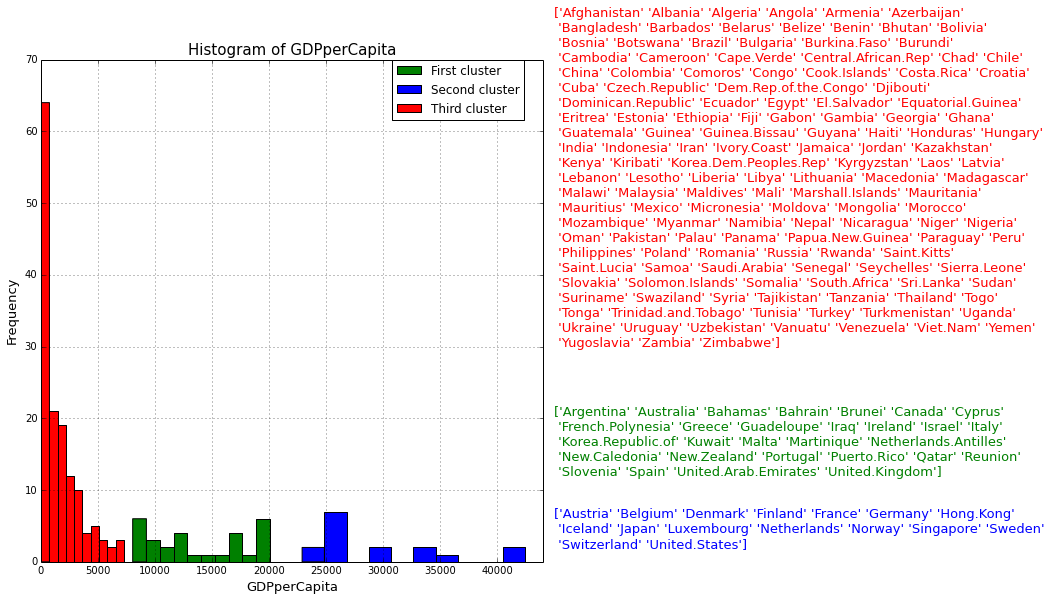

In [361]:
plt.figure(figsize=(9,9))
for k in range(3):
    plt.hist(data[Ckm_3==k,6],color=color[k],label=label[k])
plt.grid()
plt.ylabel('Frequency',fontsize=13)
plt.xlabel('GDPperCapita',fontsize=13)
plt.title('Histogram of GDPperCapita',fontsize=15)
plt.legend(bbox_to_anchor=(0.7, 1), loc=2, borderaxespad=0.)
plt.text(45000,12,country0_2,color=color[0],fontsize=13 )#, ha='center', va='center')#, transform=ax.transAxes)
plt.text(45000, 2,country1_2,color=color[1],fontsize=13 )
plt.text(45000, 30,country2_2,color=color[2],fontsize=13 )
plt.ylim(0,70)
plt.xlim(0,44000)

## Commentaitres: 

### sur cet histogram nous pouvons voir qu'il y a beaucoup plus de pays avec une PIB inférieur à 8.000 et très peu de pays avec un très fort PIB (supérieur à 20.000)

## Pie Visualisation of result of KMean applied  on GDPperCapita

(-1.1806680416147581,
 1.0043721052260326,
 -1.0046999545111424,
 1.0000000047131012)

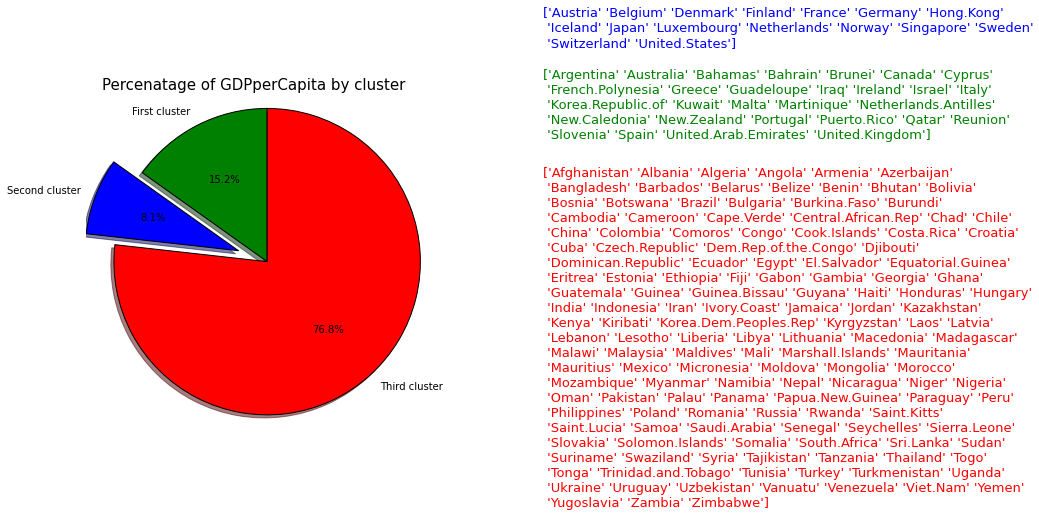

In [362]:

plt.figure(figsize=(6,6))
sizes = [len(data[Ckm_3==0,6])*100/188, len(data[Ckm_3==1,6])*100/188,len(data[Ckm_3==2,6])*100/188]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=label, colors=color,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.text(1.8,0.8,country0_2,color=color[0],fontsize=13 )#, ha='center', va='center')#, transform=ax.transAxes)
plt.text(1.8, 1.4,country1_2,color=color[1],fontsize=13 )
plt.text(1.8, -1.6,country2_2,color=color[2],fontsize=13 )
plt.title('Percenatage of GDPperCapita by cluster',fontsize=15)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

## Commentaires:

### Ce diagramme ressort les pourcentages des  différents cathégories de pays   

# End of Prgram